# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate performance 

## Import necessary libraries

Let's first import the libraries you would need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [3]:
# Import the data
df = pd.read_csv('titanic.csv')

df.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [4]:
# Create X and y 
y = df.Survived
X = df.drop(['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [35]:
# Train the classifier using training data
vanilla_dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
vanilla_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

In [36]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
vanilla_roc_auc = auc(false_positive_rate, true_positive_rate)
vanilla_roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results 

max depth 1 train auc:  0.78045321051929 test auc:  0.7389599317988065
max depth 2 train auc:  0.7607962888799894 test auc:  0.7021028701335607
max depth 3 train auc:  0.8180650113469499 test auc:  0.7477408354646207
max depth 4 train auc:  0.8243781426600809 test auc:  0.7510088093208298
max depth 5 train auc:  0.8375940016909179 test auc:  0.7520886615515772
max depth 6 train auc:  0.8599152316112669 test auc:  0.7433930093776641
max depth 7 train auc:  0.8734536999955502 test auc:  0.7651321398124469
max depth 8 train auc:  0.8725414942375295 test auc:  0.7433930093776641
max depth 9 train auc:  0.8970653673296846 test auc:  0.7412048877522024
max depth 10 train auc:  0.9055811418146219 test auc:  0.7368570616652457
max depth 11 train auc:  0.9213222533707115 test auc:  0.7575163398692811
max depth 12 train auc:  0.9288701997953098 test auc:  0.7531400966183575
max depth 13 train auc:  0.9380033818359809 test auc:  0.7455242966751917
max depth 14 train auc:  0.9446113113513995 test 

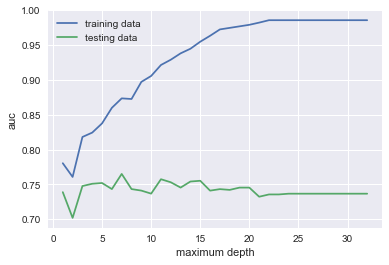

In [15]:
# Identify the optimal tree depth for given data
runs_depths = []
runs_train_auc = []
runs_test_auc = []
max_depth = np.array(range(1,33))
for depth in max_depth:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_depth = depth)
    dt.fit(X_train, y_train)
    fpr, tpr, thresh = roc_curve(y_train, dt.predict(X_train)) # train data
    train_auc = auc(fpr, tpr)
    fpr, tpr, thresh = roc_curve(y_test, dt.predict(X_test)) # test data
    test_auc = auc(fpr, tpr)
    print('max depth', depth, 'train auc: ', train_auc, 'test auc: ', test_auc)
    runs_depths.append(depth)
    runs_train_auc.append(train_auc)
    runs_test_auc.append(test_auc)
    
plt.plot(runs_depths, runs_train_auc, label='training data')
plt.plot(runs_depths, runs_test_auc, label='testing data')
plt.xlabel('maximum depth')
plt.ylabel('auc')
plt.legend()
plt.show()

In [16]:
# You observations here 
# The results drop and then plateu. It apears 7 is the best max depth

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

min_sample_splits 0.1 train auc:  0.8243225203577627 test auc:  0.7335606706450697
min_sample_splits 0.2 train auc:  0.7652015752236017 test auc:  0.7064506962205171
min_sample_splits 0.3 train auc:  0.7652015752236017 test auc:  0.7064506962205171
min_sample_splits 0.4 train auc:  0.8043318649045521 test auc:  0.7334754191531687
min_sample_splits 0.5 train auc:  0.8043318649045521 test auc:  0.7334754191531687
min_sample_splits 0.6 train auc:  0.8043318649045521 test auc:  0.7334754191531687
min_sample_splits 0.7 train auc:  0.78045321051929 test auc:  0.7389599317988065
min_sample_splits 0.8 train auc:  0.78045321051929 test auc:  0.7389599317988065
min_sample_splits 0.9 train auc:  0.78045321051929 test auc:  0.7389599317988065
min_sample_splits 1.0 train auc:  0.78045321051929 test auc:  0.7389599317988065


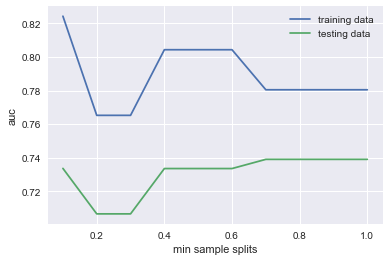

In [22]:
# Identify the optimal min-samples-split for given data
runs_min_sample_splits = []
runs_train_auc = []
runs_test_auc = []
split_range = np.array([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
for i in split_range:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_split = i)
    dt.fit(X_train, y_train)
    fpr, tpr, thresh = roc_curve(y_train, dt.predict(X_train)) # train data
    train_auc = auc(fpr, tpr)
    fpr, tpr, thresh = roc_curve(y_test, dt.predict(X_test)) # test data
    test_auc = auc(fpr, tpr)
    print('min_sample_splits', i, 'train auc: ', train_auc, 'test auc: ', test_auc)
    runs_min_sample_splits.append(i)
    runs_train_auc.append(train_auc)
    runs_test_auc.append(test_auc)
    
plt.plot(runs_min_sample_splits, runs_train_auc, label='training data')
plt.plot(runs_min_sample_splits, runs_test_auc, label='testing data')
plt.xlabel('min sample splits')
plt.ylabel('auc')
plt.legend()
plt.show()

In [23]:
# Your observations here
# a higher value in min_samples_split returns better results as we approach 0.8 and then it plateus

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

min_sample_leafs 0.1 train auc:  0.736917634494727 test auc:  0.7075873827791985
min_sample_leafs 0.2 train auc:  0.78045321051929 test auc:  0.7389599317988065
min_sample_leafs 0.3 train auc:  0.78045321051929 test auc:  0.7389599317988065
min_sample_leafs 0.4 train auc:  0.6754160548213411 test auc:  0.6387325944870701
min_sample_leafs 0.5 train auc:  0.5 test auc:  0.5


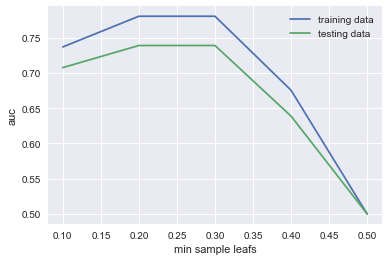

In [26]:
# Calculate the optimal value for minimum sample leafs
runs_min_sample_leafs = []
runs_train_auc = []
runs_test_auc = []
min_sample_leafs = np.array([.1, .2, .3, .4, .5])
for i in min_sample_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_leaf = i)
    dt.fit(X_train, y_train)
    fpr, tpr, thresh = roc_curve(y_train, dt.predict(X_train)) # train data
    train_auc = auc(fpr, tpr)
    fpr, tpr, thresh = roc_curve(y_test, dt.predict(X_test)) # test data
    test_auc = auc(fpr, tpr)
    print('min_sample_leafs', i, 'train auc: ', train_auc, 'test auc: ', test_auc)
    runs_min_sample_leafs.append(i)
    runs_train_auc.append(train_auc)
    runs_test_auc.append(test_auc)
    
plt.plot(runs_min_sample_leafs, runs_train_auc, label='training data')
plt.plot(runs_min_sample_leafs, runs_test_auc, label='testing data')
plt.xlabel('min sample leafs')
plt.ylabel('auc')
plt.legend()
plt.show()

In [27]:
# Your observations here 
# it appears the higher the min_samples_leaf parameter is the worse the results get. 
# I would say an optimum level is between 0.2 and 0.3

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 features vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

max_features 1 train auc:  0.9855215147065367 test auc:  0.7270247229326514
max_features 2 train auc:  0.9855215147065367 test auc:  0.7421710713270816
max_features 3 train auc:  0.9855215147065367 test auc:  0.7433077578857629
max_features 4 train auc:  0.9855215147065367 test auc:  0.7465473145780052
max_features 5 train auc:  0.9855215147065367 test auc:  0.7324524012503553
max_features 6 train auc:  0.9855215147065367 test auc:  0.7476840011366865
max_features 7 train auc:  0.9855215147065367 test auc:  0.7411196362603012
max_features 8 train auc:  0.9855215147065367 test auc:  0.6965331059960216
max_features 9 train auc:  0.9855215147065367 test auc:  0.7433077578857629
max_features 10 train auc:  0.9855215147065367 test auc:  0.7411196362603012
max_features 11 train auc:  0.9855215147065367 test auc:  0.7443876101165104
max_features 12 train auc:  0.9855215147065367 test auc:  0.7367718101733446


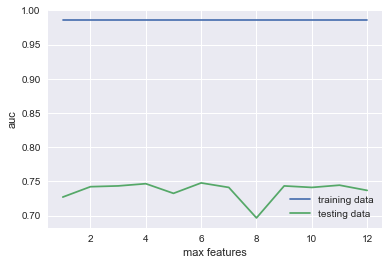

In [31]:
# Find the best value for optimal maximum feature size
runs_max_features = []
runs_train_auc = []
runs_test_auc = []
max_features = np.array(range(1, 13))
for i in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_features = i)
    dt.fit(X_train, y_train)
    fpr, tpr, thresh = roc_curve(y_train, dt.predict(X_train)) # train data
    train_auc = auc(fpr, tpr)
    fpr, tpr, thresh = roc_curve(y_test, dt.predict(X_test)) # test data
    test_auc = auc(fpr, tpr)
    print('max_features', i, 'train auc: ', train_auc, 'test auc: ', test_auc)
    runs_max_features.append(i)
    runs_train_auc.append(train_auc)
    runs_test_auc.append(test_auc)
    
plt.plot(runs_max_features, runs_train_auc, label='training data')
plt.plot(runs_max_features, runs_test_auc, label='testing data')
plt.xlabel('max features')
plt.ylabel('auc')
plt.legend()
plt.show()

In [34]:
# Your observations here
# these results are hard to interpret, There appears to be no change in accuracy. 
# number 8 looks to be a bad number of features \
# 6 and 4 are the best

## Re-train the classifier with chosen values

So now we shall use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance. 

- Train the classifier with optimal values identified 
- Compare the AUC with vanilla DT AUC 
- Interpret the results of comparison

In [40]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           random_state=SEED,
                           max_depth=7,
                           min_samples_split=1.0,
                            min_samples_leaf= 0.3,
                           max_features=6,)
dt.fit(X_train, y_train)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print('tuned AUC', roc_auc, 'Vanilla AUC', vanilla_roc_auc)

tuned AUC 0.6387325944870701 Vanilla AUC 0.7367718101733446


In [41]:
# You observations here
# the tuning lowered the auc in this instance

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 